# Problem statement

: A streaming platform company allows different streamers to use its platform to conduct/deliver a live stream session. Now, the company wants to know which are its top streamers. But the company doesn’t have a labeled dataset that indicates which are the top streamers and which are not. 


This dataset is generated from the live-streaming platform. It consists of all the streams that were conducted on the platform and the information related to each stream - its duration, country it was streamed from, no. of comments received during the stream, no. of viewers who attended the live stream etc.    






Tasks
:  1. Analyze the dataset to come up with the top 20% streamers.   
2. Label these top 20% streamers as “good” streamers, and the remaining as “bad” streamers. This will become your target variable. Now create a binary classification ML model that can classify whether any streamer is a good streamer or no




















In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('all_stream_info.csv')
df.head(3)

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,NaN,779,46,30,68,17,13,424.32,1108,13105
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,NaN,821,54,38,68,20,8,186.28,2318,90701
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,NaN,1605,529,223,696,60,17,81.14,1199,222376


In [3]:
df.columns

Index(['liveStreamID', 'beginTime', 'endTime', 'duration', 'closeBy',
       'maxLiveViewerCount', 'maxLiveViewerTime', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'cultureGroup', 'userID',
       'registerCountry', 'isContracted', 'uniqueViewerCount', 'ios',
       'android', 'durationGTE5sec', 'durationGTE2min', 'durationGTE10min',
       'avgViewerDuration', 'count', 'receivePointEstimated'],
      dtype='object')

In [4]:
df.shape

(3148, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   liveStreamID           3148 non-null   int64  
 1   beginTime              3148 non-null   object 
 2   endTime                3148 non-null   object 
 3   duration               3148 non-null   int64  
 4   closeBy                3051 non-null   object 
 5   maxLiveViewerCount     3148 non-null   int64  
 6   maxLiveViewerTime      1838 non-null   object 
 7   privateLiveStream      3148 non-null   int64  
 8   receivedLikeCount      3148 non-null   int64  
 9   streamerType           3148 non-null   int64  
 10  isShow                 3148 non-null   bool   
 11  cultureGroup           0 non-null      float64
 12  userID                 3148 non-null   object 
 13  registerCountry        3148 non-null   object 
 14  isContracted           0 non-null      float64
 15  uniq

In [6]:
df.describe()

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
count,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,0.0,0.0,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,1689.000000,3148.000000,3.148000e+03
mean,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,NaN,NaN,55.416773,26.285896,20.519377,44.560991,8.994917,3.937103,241.049467,126.772872,8.874376e+03
std,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,NaN,NaN,160.855894,81.280647,60.532012,131.896474,26.843270,13.057200,244.360800,330.297666,4.778547e+04
min,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.060000,0.000000,0.000000e+00
50%,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,185.300000,1.000000,0.000000e+00
75%,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,NaN,NaN,39.000000,20.000000,11.000000,31.000000,8.000000,3.000000,318.980000,112.250000,1.501500e+03
max,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,2855.000000,5342.000000,1.474727e+06


In [7]:
print(df['closeBy'].value_counts())

normalEnd            2673
end by new stream     129
disconnect            127
Incoming call          65
Killed                 21
Freezed                16
Upload failed          13
Crash                   4
Publish failed          2
Keep alive failed       1
Name: closeBy, dtype: int64


In [8]:
print(df['privateLiveStream'].value_counts())

0    3148
Name: privateLiveStream, dtype: int64


# DATA CLEANING

In [9]:
df.loc[df.duplicated()]  # no duplicate values are present#

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated


In [10]:
df.isnull().sum()    # 'culture group' & 'isContracted' is totally empty,'closeby','maxLiveViewerTime'
                      #'avgViewerDuration' have null values

liveStreamID                0
beginTime                   0
endTime                     0
duration                    0
closeBy                    97
maxLiveViewerCount          0
maxLiveViewerTime        1310
privateLiveStream           0
receivedLikeCount           0
streamerType                0
isShow                      0
cultureGroup             3148
userID                      0
registerCountry             0
isContracted             3148
uniqueViewerCount           0
ios                         0
android                     0
durationGTE5sec             0
durationGTE2min             0
durationGTE10min            0
avgViewerDuration        1459
count                       0
receivePointEstimated       0
dtype: int64

In [11]:
df.drop(['cultureGroup','isContracted'], axis = 1,inplace=True) # dropping empty columns#

In [12]:
df.drop(['maxLiveViewerTime'],axis=1,inplace=True) 

In [13]:
df.isnull().sum()

liveStreamID                0
beginTime                   0
endTime                     0
duration                    0
closeBy                    97
maxLiveViewerCount          0
privateLiveStream           0
receivedLikeCount           0
streamerType                0
isShow                      0
userID                      0
registerCountry             0
uniqueViewerCount           0
ios                         0
android                     0
durationGTE5sec             0
durationGTE2min             0
durationGTE10min            0
avgViewerDuration        1459
count                       0
receivePointEstimated       0
dtype: int64

In [14]:
df['avgViewerDuration'].mean()
df['avgViewerDuration'].mode()

0    7.0
dtype: float64

In [15]:
df["closeBy"].fillna('normalEnd',inplace = True)          # filling 'closeby' columns with mode value#

In [16]:
df['privateLiveStream'].value_counts()

0    3148
Name: privateLiveStream, dtype: int64

In [17]:
df['streamerType'].value_counts()

0    3148
Name: streamerType, dtype: int64

In [18]:
df.drop(['beginTime','endTime','avgViewerDuration','privateLiveStream','streamerType','isShow'],axis = 1,inplace=True) # dropping unnecessary columns#

In [19]:
df.isnull().sum()       # data is cleaned & no null values  are present#

liveStreamID             0
duration                 0
closeBy                  0
maxLiveViewerCount       0
receivedLikeCount        0
userID                   0
registerCountry          0
uniqueViewerCount        0
ios                      0
android                  0
durationGTE5sec          0
durationGTE2min          0
durationGTE10min         0
count                    0
receivePointEstimated    0
dtype: int64

# Exploratory Data Analysis(EDA)

In [20]:
df.head(2)

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
0,109437538,16918,normalEnd,363,11092,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,United States,779,46,30,68,17,13,1108,13105
1,109441785,23753,normalEnd,100,772,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,821,54,38,68,20,8,2318,90701


In [21]:
A=round(pd.value_counts(df["closeBy"],normalize=True)*100)
A

normalEnd            88.0
end by new stream     4.0
disconnect            4.0
Incoming call         2.0
Killed                1.0
Freezed               1.0
Upload failed         0.0
Crash                 0.0
Publish failed        0.0
Keep alive failed     0.0
Name: closeBy, dtype: float64

Most of the streams nearly 88% are closed by normal end, 4% end by new stream, 4% are disconnected.

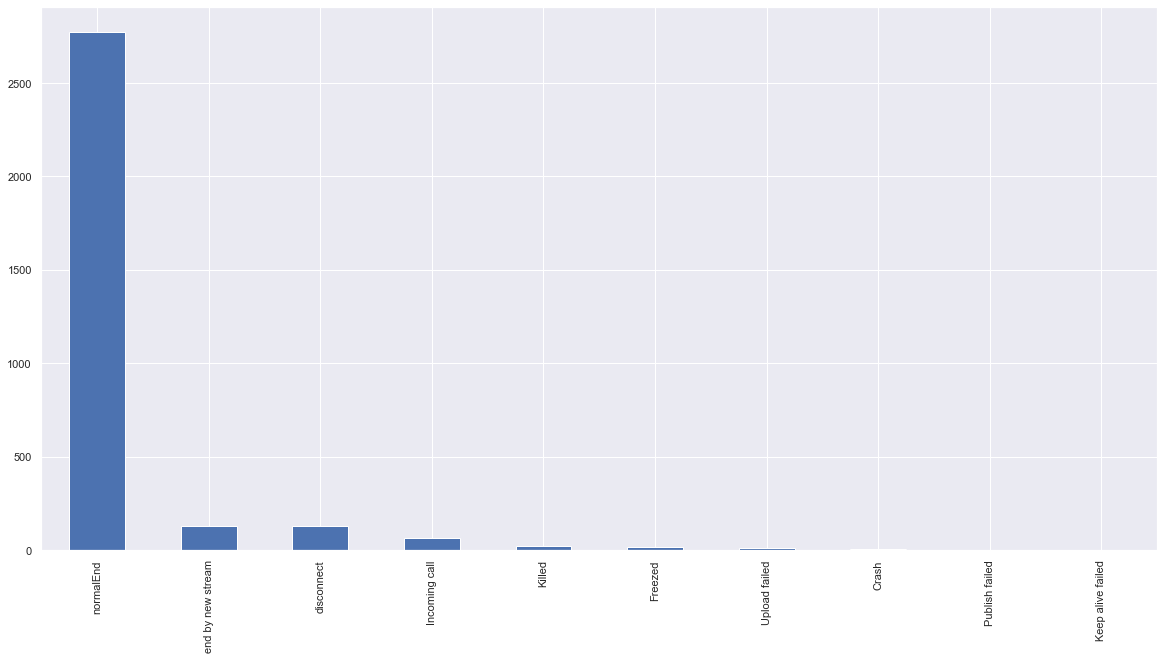

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
df["closeBy"].value_counts().plot.bar()
plt.show()

In [23]:
df['duration'].describe()

count      3148.000000
mean       3495.864041
std        6651.916426
min           0.000000
25%         136.750000
50%        1032.500000
75%        4801.500000
max      121258.000000
Name: duration, dtype: float64

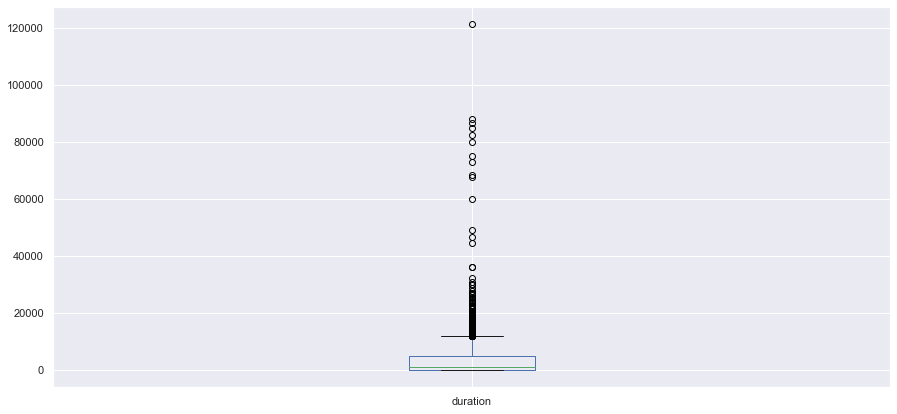

In [24]:
plt.figure(figsize=(15,7))           # there are outliers present in 'duration' #
df["duration"].plot(kind='box')  
plt.show()

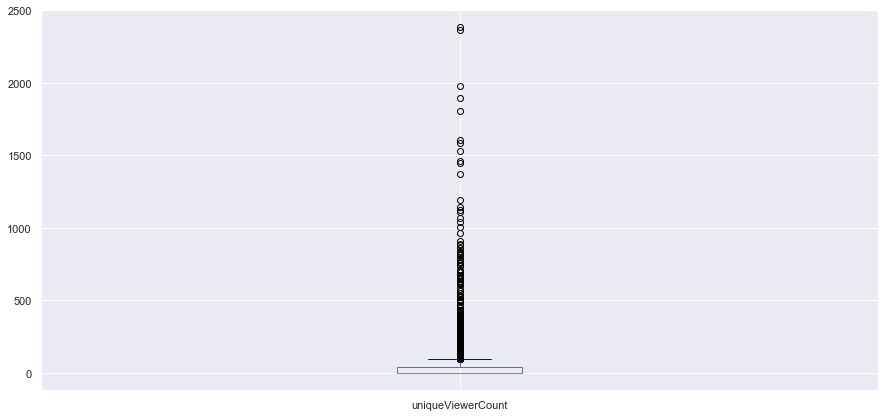

In [25]:
plt.figure(figsize=(15,7))           # there are outliers present in'uniqueViewerCount #
df["uniqueViewerCount"].plot(kind='box')  
plt.show()

In [26]:
df['duration']=(df['duration']/60)    # converting the duration into minutes

In [27]:
df.head(2)

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
0,109437538,281.966667,normalEnd,363,11092,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,United States,779,46,30,68,17,13,1108,13105
1,109441785,395.883333,normalEnd,100,772,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,821,54,38,68,20,8,2318,90701


# Outlier Treatment

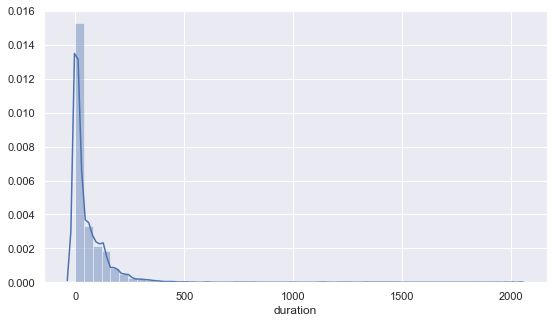

In [28]:
plt.figure(figsize=(9,5))      #  plotting distribution plot for duration
sns.distplot(df['duration'])    # It shows that distribution is right skewed
plt.show()                                                          

In [29]:
df.duration.mean()

58.264400677679056

In [30]:
df.duration.std()

110.86527377143805

In [31]:
upper_limit=df.duration.mean() + 3*df.duration.std()
upper_limit

390.8602219919932

In [32]:
lower_limit=df.duration.mean() - 3*df.duration.std()
lower_limit

-274.3314206366351

In [33]:
df[(df.duration>upper_limit)  | (df.duration<lower_limit)] 

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
1,109441785,395.883333,normalEnd,100,772,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,821,54,38,68,20,8,2318,90701
109,109385156,449.916667,normalEnd,132,4720,d3888de8-b499-4afc-bf1e-14ccf2f7b9bd,United States,910,431,391,775,130,52,1344,326176
230,109385031,818.633333,end by new stream,0,0,6c15807b-b473-4f45-9618-5e3d8dd80306,United States,0,0,0,0,0,0,0,0
237,109385466,1141.416667,end by new stream,0,0,4b2a69f7-ca18-4a31-83f1-f9e2b7637d9e,United States,0,0,0,0,0,0,0,0
496,109332718,447.683333,normalEnd,105,8549,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,1068,577,440,973,192,88,2072,584018
500,109332533,502.133333,normalEnd,6,87,a906c0bd-04d3-4bf3-83a0-9b9625f1b1e9,United States,49,37,11,45,18,12,678,1279
630,109322111,1251.900000,end by new stream,0,0,36df6b8a-b795-4216-8fdb-fcac91ad6b26,United States,0,0,0,0,0,0,0,0
637,109323285,2020.966667,end by new stream,0,0,61274db9-3247-4f12-8f16-09259073d3f8,United States,0,0,0,0,0,0,0,0
638,109335504,1214.750000,end by new stream,0,0,a7a1772f-7adc-4fdf-80e2-75d7c196f7d2,United States,0,0,0,0,0,0,0,0
673,109336431,1126.566667,end by new stream,0,0,67c5aa99-86b0-4efe-91d5-ede5ceb5880e,United States,0,0,0,0,0,0,0,0


In [34]:
df_new=df[(df.duration<upper_limit)  & (df.duration>lower_limit)] # removing outliers in duration column

In [35]:
upper_limit=df_new.uniqueViewerCount.mean() + 3*df_new.uniqueViewerCount.std()
upper_limit

463.64215222744474

In [36]:
lower_limit=df_new.uniqueViewerCount.mean() - 3*df_new.uniqueViewerCount.std()
lower_limit

-361.60362895296635

In [37]:
df_new[(df_new.uniqueViewerCount>upper_limit)  | (df_new.uniqueViewerCount<lower_limit)]

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
0,109437538,281.966667,normalEnd,363,11092,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,United States,779,46,30,68,17,13,1108,13105
2,109438205,222.200000,disconnect,471,19403,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,United States,1605,529,223,696,60,17,1199,222376
41,109387762,245.666667,normalEnd,121,2544,6b527a09-bbfa-4ef0-8368-13f757a30cab,United States,536,213,264,468,55,27,878,130088
45,109395677,162.483333,normalEnd,154,3927,32563571-1708-4c7e-ae9a-95ec13f56fc2,United States,810,463,267,699,115,50,706,130682
81,109389398,307.116667,normalEnd,355,22479,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,2385,1639,570,2142,477,251,5342,370581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,109413285,160.666667,normalEnd,404,19164,c72650ff-8146-4c46-839f-4cd4cbe19802,United States,884,517,292,796,153,40,1907,124199
2790,109400301,178.900000,normalEnd,52,1189,033eb47a-557a-4c2d-9ead-61eee57ae184,United States,635,422,185,592,154,77,1668,714158
2810,109400631,240.766667,normalEnd,493,28918,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,1460,816,561,1333,363,178,3301,29144
2811,109415815,78.100000,normalEnd,241,12135,8c7e88b6-2931-4fea-97c9-4cc9f0d72503,United States,695,312,317,627,93,24,206,11939


In [38]:
dff=df_new[(df_new.uniqueViewerCount<upper_limit)  & (df_new.uniqueViewerCount>lower_limit)] # removing outliers in 'uniqueViewerCount'

In [39]:
df.shape   # shape of data before removing outliers#

(3148, 15)

In [40]:
dff.shape   # shape of data after removing outliers

(3049, 15)

In [41]:
dff.head(3)

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
3,109438917,113.10,normalEnd,44,191,b4dc876b-06fe-48b2-a40b-fa7f5007697a,United States,96,23,24,41,12,8,432,4313
4,109442185,29.70,normalEnd,52,77,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,109,20,18,38,17,5,162,1547
5,109440894,29.15,normalEnd,45,107,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,116,25,27,52,19,4,104,3095


In [42]:
plt.figure(figsize=(15,6))
a=round(dff.groupby('closeBy')['uniqueViewerCount'].mean().sort_values(ascending=False))
a

closeBy
disconnect           38.0
normalEnd            38.0
Upload failed        13.0
Keep alive failed     7.0
end by new stream     6.0
Killed                4.0
Incoming call         2.0
Freezed               1.0
Crash                 0.0
Publish failed        0.0
Name: uniqueViewerCount, dtype: float64

<Figure size 1080x432 with 0 Axes>

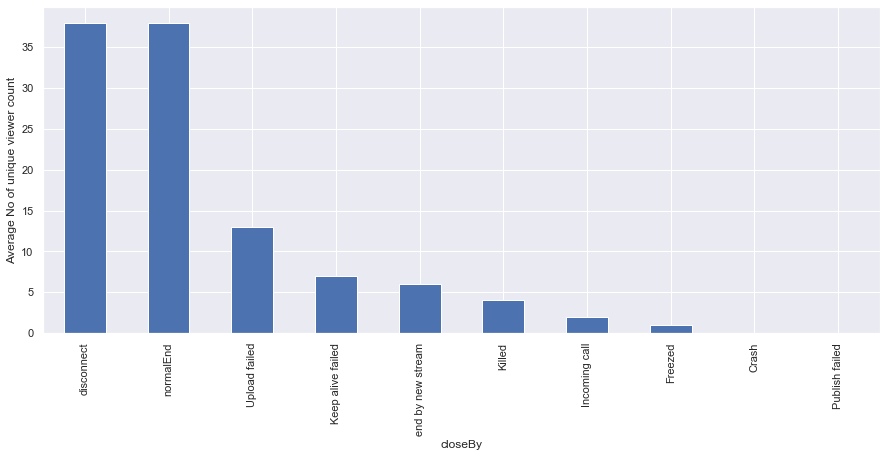

In [43]:
plt.figure(figsize=(15,6))
ax=a.plot(kind='bar')
ax.set_ylabel('Average No of unique viewer count')
plt.show()

Normal end & disconnect have highest average no of unique viewer counts

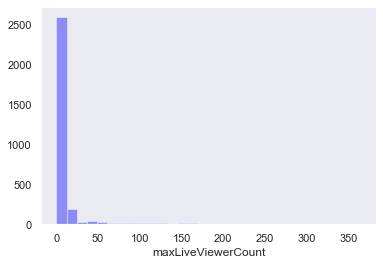

In [44]:
sns.set(style='dark')
sns.distplot(dff["maxLiveViewerCount"], kde = False, color ='blue',bins = 30) 
plt.show()

Max number of live viewers at any time during the entire stream were mostly between 0-50 in any stream

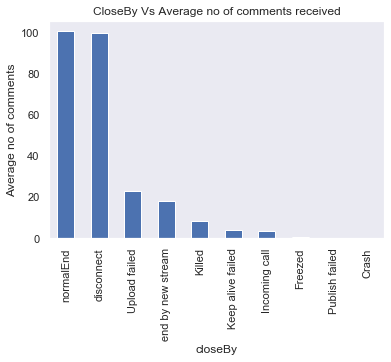

In [45]:
A=dff.groupby('closeBy')['count'].mean().sort_values(ascending=False)
B=A.plot(kind='bar')
B.set_title('CloseBy Vs Average no of comments received')
B.set_ylabel('Average no of comments')
plt.show()

Most of comments were higher in normal & disconnected.

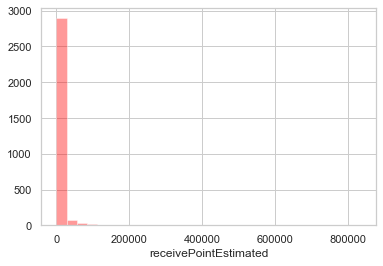

In [46]:
sns.set_style('whitegrid') 
sns.distplot(dff["receivePointEstimated"], kde = False, color ='red', bins = 30) 
plt.show()

In [47]:
round(dff['count'].mean())

print("Average no of comments received in any stream is",round(dff['count'].mean()))

Average no of comments received in any stream is 94


In [48]:
dff.drop(['userID'],axis=1,inplace=True)

In [49]:
dff.head(2)

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
3,109438917,113.1,normalEnd,44,191,United States,96,23,24,41,12,8,432,4313
4,109442185,29.7,normalEnd,52,77,United States,109,20,18,38,17,5,162,1547


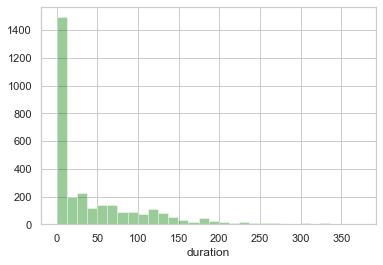

In [50]:
sns.set_style('whitegrid') 
sns.distplot(dff["duration"], kde = False, color ='green', bins = 30) 
plt.show()

Most of streams  have duration between 0-30 min.

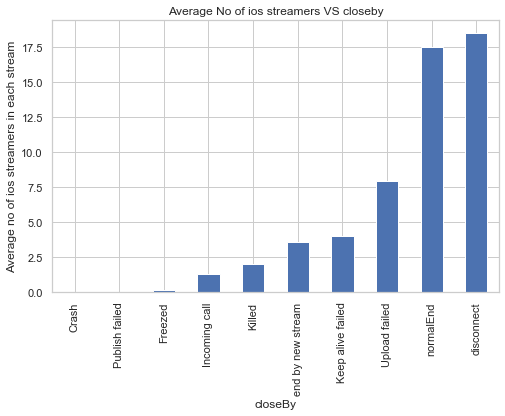

In [51]:
plt.figure(figsize=(8,5))
A=dff.groupby('closeBy')['ios'].mean().sort_values(ascending=True).plot(kind='bar')
A.set_ylabel('Average no of ios streamers in each stream')
A.set_title("Average No of ios streamers VS closeby")
plt.show()

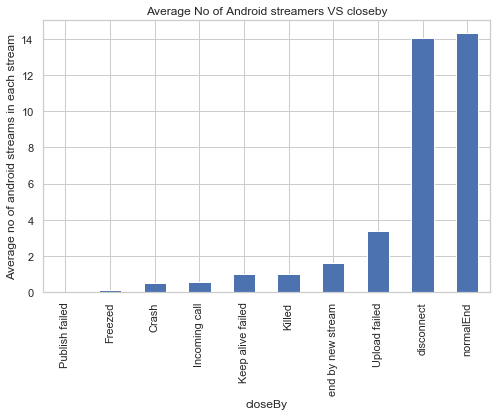

In [52]:
plt.figure(figsize=(8,5))
B=dff.groupby('closeBy')['android'].mean().sort_values(ascending=True).plot(kind='bar')
B.set_ylabel('Average no of android streams in each stream')
B.set_title("Average No of Android streamers VS closeby")
plt.show()

Average no of ios & android streamers in every stream is almost equal(between 14-18)

In [53]:
print("Average no of  streamers in a particular stream with stream duration greater than 5sec is",round(df['durationGTE5sec'].mean()))
print("Average no of streamers in a particular stream with stream duration greater than 2 min is",round(df['durationGTE2min'].mean()))
print("Average no of streamers in a particular stream with stream duration greater than 10 min is",round(df['durationGTE10min'].mean()))

Average no of  streamers in a particular stream with stream duration greater than 5sec is 45
Average no of streamers in a particular stream with stream duration greater than 2 min is 9
Average no of streamers in a particular stream with stream duration greater than 10 min is 4


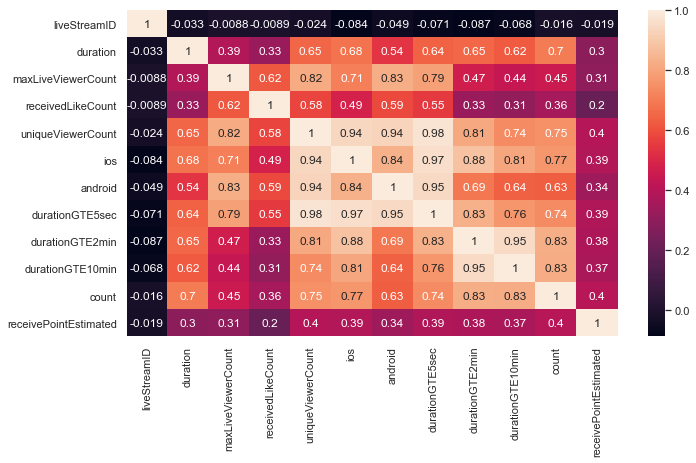

In [54]:
plt.figure(figsize=(11,6))
sns.heatmap(dff.corr(),annot=True)
plt.show()

"count(total comments count)" & "duration" is highly co-related.

"uniqueviewer count" & "duration" are co-related.

also,"received Likecount" & "duration" shows good co-relation.

durationGTE 5sec,durationGTE 2min,durationGTE 10min are also co-related with duration

This shows us that most of the variables are co-related with duration.

In [55]:
dff.head(3)

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
3,109438917,113.10,normalEnd,44,191,United States,96,23,24,41,12,8,432,4313
4,109442185,29.70,normalEnd,52,77,United States,109,20,18,38,17,5,162,1547
5,109440894,29.15,normalEnd,45,107,United States,116,25,27,52,19,4,104,3095


# Creating Target variable 'streamer_Type' on the basis of duration column

In [56]:
dff.sort_values(by='duration',ascending=False)  # sorting data basis duration 

,liveStreamID,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated
1534,109370931,374.200000,normalEnd,6,1577,United States,90,50,28,74,13,8,109,5498
83,109391258,371.200000,normalEnd,229,1182,United States,338,189,131,316,43,23,874,24733
1606,109384350,370.833333,end by new stream,0,0,United States,0,0,0,0,0,0,0,0
972,109337328,370.816667,normalEnd,16,1208,United States,395,232,126,344,99,31,631,83736
574,109323827,364.033333,normalEnd,16,114,United States,212,146,33,176,45,12,441,6843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,109361366,0.000000,normalEnd,0,0,United States,0,0,0,0,0,0,0,0
1139,109336766,0.000000,normalEnd,0,0,United States,0,0,0,0,0,0,0,0
2444,109361558,0.000000,normalEnd,0,0,United States,0,0,0,0,0,0,0,0
2519,109361626,0.000000,normalEnd,0,0,United States,0,0,0,0,0,0,0,0


In [57]:
dff.shape

(3049, 14)

In [58]:
dff.drop(['liveStreamID'],axis =1,inplace=True)

In [59]:
dff['duration'][:619]          

3      113.100000
4       29.700000
5       29.150000
6       29.266667
7       29.866667
          ...    
642     32.900000
643      0.016667
644     11.633333
645      0.166667
646      0.583333
Name: duration, Length: 619, dtype: float64

we have to name top 20% streamers as good_stremers and rest as bad_streamers.we already sorted data basis duration in descending order .

So, we just have to name first 20% rows(i.e 620 rows) in duration column with duration >91 as good_streamers & rest as bad_streamers.

In [60]:
def streamer(duration):     # creating a function streamer_type#
    if duration>91:               #if duration >91 then'good streamer
        duration="good streamer"       #or else 'bad steamer'
    else:
        duration="Bad streamer "
    return  duration

In [61]:
dff['stremer_Type']=dff['duration'].apply(streamer)   

In [62]:
dff.reset_index()

,index,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated,stremer_Type
0,3,113.100000,normalEnd,44,191,United States,96,23,24,41,12,8,432,4313,good streamer
1,4,29.700000,normalEnd,52,77,United States,109,20,18,38,17,5,162,1547,Bad streamer
2,5,29.150000,normalEnd,45,107,United States,116,25,27,52,19,4,104,3095,Bad streamer
3,6,29.266667,normalEnd,50,199,United States,120,23,19,40,19,12,106,2112,Bad streamer
4,7,29.866667,normalEnd,365,3424,United States,377,83,53,131,11,4,143,149405,Bad streamer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,3143,122.133333,normalEnd,7,134,United States,42,18,18,34,8,3,212,33,good streamer
3045,3144,104.800000,normalEnd,37,143,United States,93,48,40,82,6,2,77,1328,good streamer
3046,3145,149.133333,normalEnd,4,41,United States,15,12,3,14,4,0,58,32,good streamer
3047,3146,69.983333,normalEnd,7,72,United States,44,21,23,41,12,8,190,39166,Bad streamer


In [63]:
dff.head(3) #target variable is created#

,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated,stremer_Type
3,113.10,normalEnd,44,191,United States,96,23,24,41,12,8,432,4313,good streamer
4,29.70,normalEnd,52,77,United States,109,20,18,38,17,5,162,1547,Bad streamer
5,29.15,normalEnd,45,107,United States,116,25,27,52,19,4,104,3095,Bad streamer


# Model Building

# Creating independent and dependent variable

In [64]:
#Independented Varibales
X = dff.drop('stremer_Type',axis=1)

# Dependent variables
y = dff.stremer_Type

In [65]:
#Encoding dependented variable to binary > 'good streamer to '0' Bad streamer to '1'
y.replace(['good streamer','Bad streamer '],[0,1],inplace=True)

In [66]:
y.unique()

array([0, 1], dtype=int64)

In [67]:
dff.head(5)

,duration,closeBy,maxLiveViewerCount,receivedLikeCount,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated,stremer_Type
3,113.100000,normalEnd,44,191,United States,96,23,24,41,12,8,432,4313,0
4,29.700000,normalEnd,52,77,United States,109,20,18,38,17,5,162,1547,1
5,29.150000,normalEnd,45,107,United States,116,25,27,52,19,4,104,3095,1
6,29.266667,normalEnd,50,199,United States,120,23,19,40,19,12,106,2112,1
7,29.866667,normalEnd,365,3424,United States,377,83,53,131,11,4,143,149405,1


# Creating Dummies

In [68]:
X = pd.get_dummies(X,drop_first=True)

In [69]:
X.head(4)

,duration,maxLiveViewerCount,receivedLikeCount,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,count,receivePointEstimated,closeBy_Freezed,closeBy_Incoming call,closeBy_Keep alive failed,closeBy_Killed,closeBy_Publish failed,closeBy_Upload failed,closeBy_disconnect,closeBy_end by new stream,closeBy_normalEnd
3,113.100000,44,191,96,23,24,41,12,8,432,4313,0,0,0,0,0,0,0,0,1
4,29.700000,52,77,109,20,18,38,17,5,162,1547,0,0,0,0,0,0,0,0,1
5,29.150000,45,107,116,25,27,52,19,4,104,3095,0,0,0,0,0,0,0,0,1
6,29.266667,50,199,120,23,19,40,19,12,106,2112,0,0,0,0,0,0,0,0,1


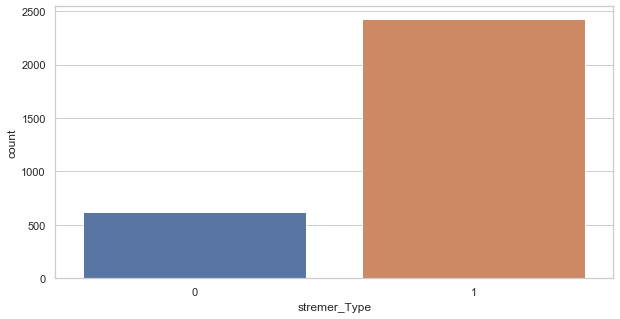

In [84]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(dff['stremer_Type'],ax=ax,)
plt.show()


Balancing the dataset using the SMOTE
From all above observation we can observe the target variable which is "stremer_Type" is inbalance in nature which we can observe from above plot, number of 'Bad streamers are more in number than 'good streamers. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the Synthetic Minority Oversample TechniquE ( SMOTE ) for it to make it balance

In [85]:
# Importing  the imblearn
! pip install imblearn

In [86]:
#Importing the imblearn and SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [87]:
X_resm, y_resm = SMOTE(k_neighbors=5).fit_resample(X,y)

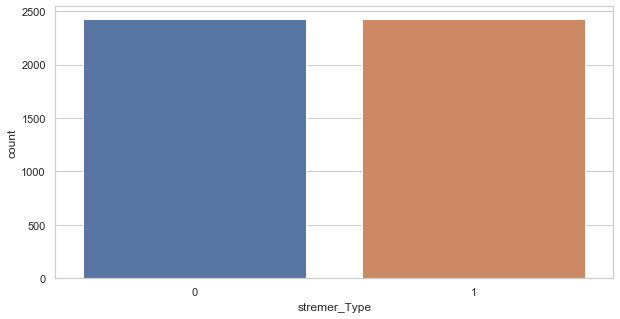

In [88]:
# doing Count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resm),ax=ax)
plt.show()

From above observation we can see the target variable which is 'y' (stremer_Type) got balance

In [89]:
#Importing  of the train & test split
from sklearn.model_selection import train_test_split

#Spliting  of the to train,test
X_train,X_test,y_train,y_test = train_test_split(X_resm,y_resm,test_size=0.2,random_state=1001)

In [90]:
#Checking shape of train,test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3878, 20), (970, 20), (3878,), (970,))

# Logistic Regression

In [91]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [92]:
# model fitting 
model.fit(X_train,y_train)

LogisticRegression()

In [93]:
#predicating for X_test
y_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [95]:
accuracy_score(y_test,y_pred)

0.8577319587628865

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       475
           1       0.96      0.75      0.84       495

    accuracy                           0.86       970
   macro avg       0.88      0.86      0.86       970
weighted avg       0.88      0.86      0.86       970



In [98]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

Evaluation matrix is F1 score- f1 score for 0(good streamer) is 0.87 & for 1(bad streamer) is 0.87

The accuracy of model is quite well i.e 85.7%. 